In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import datetime

SA_CO_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/CO/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/CO/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/CO/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/CO/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/CO/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/CO/2020.csv'])
, ignore_index=True)

In [3]:
import datetime
# the data is collected across multiple sites daily
# TODO: Consider the geographical distribution of the sites and their proximity to each other.
# this function calculates the daily average across all sites - Spatial aggregation
def calculate_daily_average(dataset, date_column, pollutant):
  # Ensure the date column is in datetime format
  dataset[date_column] = pd.to_datetime(dataset[date_column])
  dataset[date_column] = dataset[date_column].dt.date
  daily_avg = dataset.groupby(date_column)[pollutant].mean().reset_index()

  return daily_avg


In [4]:
SA_CO_full = calculate_daily_average(SA_CO_full, 'Date', 'Daily Max 8-hour CO Concentration')

In [5]:
# Some of the dataset contain missing dates
# this method finds those dates
def find_missing_dates(data, date_column):
  # Ensure the date column is in datetime format
  data[date_column] = pd.to_datetime(data[date_column])
  # Create a full range od dates
  min_date = data[date_column].min()
  max_date = data[date_column].max()
  full_dates = pd.date_range(start=min_date, end=max_date, freq='D')

  # Find missing dates
  missing_dates = full_dates.difference(data[date_column])

  return missing_dates

In [6]:
missing_dates = find_missing_dates(SA_CO_full, 'Date')

In [7]:
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [8]:
SA_NO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/NO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/NO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/NO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/NO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/NO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/NO2/2020.csv'])
, ignore_index=True)

In [9]:
SA_NO2_full = calculate_daily_average(SA_NO2_full, 'Date', 'Daily Max 1-hour NO2 Concentration')
missing_dates = find_missing_dates(SA_NO2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [10]:
SA_Ozone_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/Ozone/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/Ozone/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/Ozone/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/Ozone/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/Ozone/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/Ozone/2020.csv'])
, ignore_index=True)

In [11]:
SA_Ozone_full = calculate_daily_average(SA_Ozone_full, 'Date', 'Daily Max 8-hour Ozone Concentration')
missing_dates = find_missing_dates(SA_Ozone_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31'],
              dtype='datetime64[ns]', freq=None)


In [12]:
def process_data(data,  date_column, missing_dates):
  # Convert 'Date' column to datetime if it is not already
  data[date_column] = pd.to_datetime(data[date_column])

  # Set 'Date' as the index
  data.set_index(date_column, inplace=True)

  # Add the missing dates to the DataFrame with NaN values
  data = data.reindex(data.index.union(missing_dates))

  #Reset index to make 'Date' a regular column again
  data.reset_index(inplace=True)

  data.fillna(0, inplace=True)

  return data


In [13]:
SA_Ozone_full = process_data(SA_Ozone_full, 'Date', missing_dates)

In [14]:
# manually add 2020-12-31
new_entry = {'index': pd.to_datetime('2020-12-31'), 'Daily Max 8-hour Ozone Concentration': 0.0326668}
SA_Ozone_full.loc[len(SA_Ozone_full)] = new_entry

In [15]:
SA_Ozone_full.reset_index(drop=True, inplace=True)

In [16]:
SA_PM2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/PM2.5/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/PM2.5/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/PM2.5/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/PM2.5/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/PM2.5/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/PM2.5/2020.csv'])
, ignore_index=True)

In [17]:
SA_PM2_full = calculate_daily_average(SA_PM2_full, 'Date', 'Daily Mean PM2.5 Concentration')
missing_dates = find_missing_dates(SA_PM2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [18]:
SA_PM10_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/PM10/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/PM10/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/PM10/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/PM10/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/PM10/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/PM10/2020.csv'])
, ignore_index=True)

In [19]:
SA_PM10_full = calculate_daily_average(SA_PM10_full, 'Date', 'Daily Mean PM10 Concentration')
missing_dates = find_missing_dates(SA_PM10_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [20]:
SA_SO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/SO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/SO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/SO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/SO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/SO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Bernardino/SO2/2020.csv'])
, ignore_index=True)

In [21]:
SA_SO2_full = calculate_daily_average(SA_SO2_full, 'Date', 'Daily Max 1-hour SO2 Concentration')
missing_dates = find_missing_dates(SA_SO2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [22]:
SA_CO_full.rename(columns = {'index':'Date'}, inplace = True)
SA_NO2_full.rename(columns = {'index':'Date'}, inplace = True)
SA_Ozone_full.rename(columns = {'index':'Date'}, inplace = True)
SA_PM2_full.rename(columns = {'index':'Date'}, inplace = True)
SA_PM10_full.rename(columns = {'index':'Date'}, inplace = True)
SA_SO2_full.rename(columns = {'index':'Date'}, inplace = True)

In [23]:
from functools import reduce
combine = reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), [SA_CO_full,SA_NO2_full,SA_Ozone_full,SA_PM2_full,SA_PM10_full,SA_SO2_full])

In [24]:
combine.head()

,Date,Daily Max 8-hour CO Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean PM2.5 Concentration,Daily Mean PM10 Concentration,Daily Max 1-hour SO2 Concentration
0,2015-01-01,0.816667,32.271429,0.0383,18.700000,31.2,1.733333
1,2015-01-02,0.900000,38.628571,0.0322,22.400000,28.5,1.833333
2,2015-01-03,0.950000,38.585714,0.0314,25.871429,40.5,1.900000
3,2015-01-04,1.033333,37.271429,0.0290,20.500000,28.0,1.100000
4,2015-01-05,0.783333,37.742857,0.0301,11.750000,25.5,1.800000


In [25]:
combine.rename(columns = {'Daily Max 8-hour CO Concentration':'CO', 'Daily Max 1-hour NO2 Concentration': 'NO2',
                          'Daily Max 8-hour Ozone Concentration': 'Ozone', 'Daily Mean PM2.5 Concentration': 'PM2.5',
                          'Daily Mean PM10 Concentration': 'PM10', 'Daily Max 1-hour SO2 Concentration': 'SO2' }, inplace = True)

In [26]:
combine

,Date,CO,NO2,Ozone,PM2.5,PM10,SO2
0,2015-01-01,0.816667,32.271429,0.038300,18.700000,31.200000,1.733333
1,2015-01-02,0.900000,38.628571,0.032200,22.400000,28.500000,1.833333
2,2015-01-03,0.950000,38.585714,0.031400,25.871429,40.500000,1.900000
3,2015-01-04,1.033333,37.271429,0.029000,20.500000,28.000000,1.100000
4,2015-01-05,0.783333,37.742857,0.030100,11.750000,25.500000,1.800000
...,...,...,...,...,...,...,...
2187,2020-12-27,0.616667,26.300000,0.034800,12.800000,19.428571,0.566667
2188,2020-12-28,0.350000,23.012500,0.038100,4.000000,5.000000,0.466667
2189,2020-12-29,0.383333,28.912500,0.035273,4.163636,5.400000,0.533333
2190,2020-12-30,0.533333,36.900000,0.036700,8.660000,12.666667,1.266667


In [27]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [28]:
# descriptive statistics of the data
print(combine.describe())

                CO          NO2        Ozone        PM2.5         PM10  \
count  2192.000000  2192.000000  2192.000000  2192.000000  2192.000000   
mean      0.470584    31.421809     0.053369    11.365014    26.312144   
std       0.179383     9.059811     0.015945     5.009663    13.752670   
min       0.133333     8.362500     0.000000     1.833333     2.000000   
25%       0.333333    24.809375     0.040200     8.109375    18.000000   
50%       0.433333    31.333036     0.051583    10.816667    25.500000   
75%       0.583333    37.842857     0.065909    13.770833    32.555556   
max       1.550000    60.550000     0.103333    43.340000   200.625000   

               SO2  
count  2192.000000  
mean      1.410835  
std       1.062931  
min      -0.066667  
25%       0.866667  
50%       1.300000  
75%       1.766667  
max      25.500000  


In [29]:
# show intensity of each pollutant over time
fig = go.Figure()

for pollutant in ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']:
  fig.add_trace(go.Scatter(x=combine['Date'], y=combine[pollutant], mode='lines',
                           name=pollutant))

fig.update_layout(title='Time Series Analysis of Air Pollutants in Los Angeles',
                  xaxis_title='Date', yaxis_title='Concentration (ug/m3)')

fig.show()

In [30]:
#Calculate Air Quality Index
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
  for low, high, aqi in aqi_breakpoints:
    if low <= concentration <= high:
      return aqi
  return None

def calculate_overall_aqi(row):
  aqi_values = []
  pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']
  for pollutant in pollutants:
    aqi = calculate_aqi(pollutant, row[pollutant])
    if aqi is not None:
      aqi_values.append(aqi)
  return max(aqi_values)


# Calculate AQI for each row
combine['AQI'] = combine.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
  for low, high, category in aqi_categories:
    if low <= aqi_value <= high:
      return category
  return None

In [31]:
#Categorize AQI
combine['AQI Category'] = combine['AQI'].apply(categorize_aqi)
print(combine.head())

        Date        CO        NO2   Ozone      PM2.5  PM10       SO2  AQI  \
0 2015-01-01  0.816667  32.271429  0.0383  18.700000  31.2  1.733333  100   
1 2015-01-02  0.900000  38.628571  0.0322  22.400000  28.5  1.833333  150   
2 2015-01-03  0.950000  38.585714  0.0314  25.871429  40.5  1.900000  150   
3 2015-01-04  1.033333  37.271429  0.0290  20.500000  28.0  1.100000  150   
4 2015-01-05  0.783333  37.742857  0.0301  11.750000  25.5  1.800000  150   

                     AQI Category  
0                        Moderate  
1  Unhealthy for Sensitive Groups  
2  Unhealthy for Sensitive Groups  
3  Unhealthy for Sensitive Groups  
4  Unhealthy for Sensitive Groups  


In [32]:
asthma_data = pd.read_csv('gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/asthma-hospitalization-rates-by-county.csv', encoding="ISO-8859-1")

asthma_data['NUMBER OF HOSPITALIZATIONS'] = asthma_data['NUMBER OF HOSPITALIZATIONS'].str.replace(',', '').astype(float)

print(asthma_data.head())

       COUNTY  YEAR            STRATA STRATA NAME AGE GROUP  \
0  California  2015  Total population    All ages  All ages   
1     Alameda  2015  Total population    All ages  All ages   
2      Alpine  2015  Total population    All ages  All ages   
3      Amador  2015  Total population    All ages  All ages   
4       Butte  2015  Total population    All ages  All ages   

   NUMBER OF HOSPITALIZATIONS  AGE-ADJUSTED HOSPITALIZATION RATE COMMENT  
0                     27262.0                                7.0     NaN  
1                      1435.0                                9.3     NaN  
2                         0.0                                0.0     NaN  
3                        28.0                                7.5     NaN  
4                       143.0                                6.7     NaN  


In [33]:
combine['COUNTY'] = 'San Bernardino'

In [34]:
combine['Date'] = pd.to_datetime(combine['Date'])
combine_yearly = combine.groupby(['COUNTY',combine['Date'].dt.year]).mean().reset_index()
combine_yearly.rename(columns = {'Date':'YEAR'}, inplace = True)
merged_data = pd.merge(asthma_data, combine_yearly, how='inner', left_on=['COUNTY', 'YEAR'], right_on=['COUNTY', 'YEAR'])
# Perform correlation analysis
correlation_matrix = merged_data[['NUMBER OF HOSPITALIZATIONS', 'CO', 'NO2', 'Ozone', 'PM2.5', 'SO2', 'AQI']].corr()

<ipython-input-34-28fbee1b0bae>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [35]:
merged_data.head(5)

,COUNTY,YEAR,STRATA,STRATA NAME,AGE GROUP,NUMBER OF HOSPITALIZATIONS,AGE-ADJUSTED HOSPITALIZATION RATE,COMMENT,CO,NO2,Ozone,PM2.5,PM10,SO2,AQI
0,San Bernardino,2015,Total population,All ages,All ages,1717.0,8.1,NaN,0.538795,31.828802,0.051752,12.132166,23.150187,1.037854,121.232877
1,San Bernardino,2015,Child vs. adult,017 years,017 years,569.0,9.9,NaN,0.538795,31.828802,0.051752,12.132166,23.150187,1.037854,121.232877
2,San Bernardino,2015,Child vs. adult,18+ years,18+ years,1148.0,7.5,NaN,0.538795,31.828802,0.051752,12.132166,23.150187,1.037854,121.232877
3,San Bernardino,2015,Age groups,04 years,04 years,252.0,15.9,NaN,0.538795,31.828802,0.051752,12.132166,23.150187,1.037854,121.232877
4,San Bernardino,2015,Age groups,517 years,517 years,317.0,7.7,NaN,0.538795,31.828802,0.051752,12.132166,23.150187,1.037854,121.232877


In [36]:
print(correlation_matrix)

                            NUMBER OF HOSPITALIZATIONS        CO       NO2  \
NUMBER OF HOSPITALIZATIONS                    1.000000  0.238024  0.129250   
CO                                            0.238024  1.000000  0.886498   
NO2                                           0.129250  0.886498  1.000000   
Ozone                                        -0.383010 -0.407939 -0.056017   
PM2.5                                         0.046725  0.697363  0.773322   
SO2                                          -0.118027 -0.769098 -0.611850   
AQI                                          -0.225745  0.364973  0.471681   

                               Ozone     PM2.5       SO2       AQI  
NUMBER OF HOSPITALIZATIONS -0.383010  0.046725 -0.118027 -0.225745  
CO                         -0.407939  0.697363 -0.769098  0.364973  
NO2                        -0.056017  0.773322 -0.611850  0.471681  
Ozone                       1.000000  0.192244  0.096968  0.587671  
PM2.5                       0.

In [ ]:
# AQI over time
fig = px.bar(combine, x="Date", y="AQI",
             title="AQI of San Bernardino from 2015 - 2020")
fig.update_xaxes(title='Date')
fig.update_yaxes(title="AQI")
fig.show()

In [ ]:
# AQI Category distribution
fig = px.histogram(combine, x="Date",
                   color="AQI Category",
                   title="AQI Category Distribution Over Time")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Count")
fig.show()

In [ ]:
# Distribution of Pollutants in the air quality of Los Angeles
pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = combine[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Los Angeles",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant")

# Show the donut plot
fig.show()

In [ ]:
# Correlation Between Pollutants
correlation_matrix = combine[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants, y=pollutants, title="Correlation Between Pollutants")
fig.show()

In [37]:
# Correlation Between Pollutants and Number of Hospitalization
parameters = ['CO', 'NO2', 'Ozone', 'PM2.5', 'SO2', 'AQI', 'NUMBER OF HOSPITALIZATIONS']
correlation_matrix = merged_data[parameters].corr()
fig = px.imshow(correlation_matrix, x=parameters, y=parameters, title="Correlation Between Pollutants and No. of Hospitalization")
fig.show()

In [ ]:
combine['Day_of_Week'] = combine['Date'].dt.day_name()
average_aqi_by_day = combine.groupby('Day_of_Week')['AQI'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_day, x=average_aqi_by_day.index, y="AQI",
              title="Average AQI by Day Trends in San Bernardino")
fig.update_xaxes(title="Day of the Week")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
combine['Year'] = combine['Date'].dt.year
average_aqi_by_year = combine.groupby('Year')['AQI'].mean()

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_year, x=average_aqi_by_year.index, y="AQI",
              title="Average AQI by Year Trends in San Bernardino")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import calendar
combine['Month'] = combine['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
average_aqi_by_month = combine.groupby('Month')['AQI'].mean()
# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_month, x=average_aqi_by_month.index, y="AQI",
              title="Average AQI by Month Trends in San Bernardino")
fig.update_xaxes(title="Months")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

#Convert 'Date' to datetime and set it as the index
combine['Date'] = pd.to_datetime(combine['Date'])
combine.set_index('Date', inplace=True)

In [ ]:
# Feature Scaling
scaler = MinMaxScaler()
combine['AQI_scaled'] = scaler.fit_transform(combine['AQI'].values.reshape(-1,1))

In [ ]:
# Define sequence length and number of future time steps to predict
sequence_length = 30
#num_future_steps = 3 # Adjust according to needs

# function to create sequences for LSTM
def create_sequences(data, seq_length):
  X = []
  y = []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

In [ ]:
 #Create sequences with multiple future time steps
X, y = create_sequences(combine['AQI_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM input
#X_train = X_train.reshape((X_train.shape[0], sequence_length, len(target_variable)))
#X_test = X_test.reshape((X_test.shape[0], sequence_length, len(target_variable )))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model.compile(optimizer='adam', loss='mse')

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 3s 36ms/step - loss: 0.0198 - val_loss: 0.0090
Epoch 2/50
44/44 [==============================] - 1s 24ms/step - loss: 0.0109 - val_loss: 0.0089
Epoch 3/50
44/44 [==============================] - 1s 22ms/step - loss: 0.0108 - val_loss: 0.0090
Epoch 4/50
44/44 [==============================] - 1s 24ms/step - loss: 0.0110 - val_loss: 0.0088
Epoch 5/50
44/44 [==============================] - 1s 24ms/step - loss: 0.0107 - val_loss: 0.0090
Epoch 6/50
44/44 [==============================] - 1s 21ms/step - loss: 0.0107 - val_loss: 0.0088
Epoch 7/50
44/44 [==============================] - 1s 14ms/step - loss: 0.0107 - val_loss: 0.0087
Epoch 8/50
44/44 [==============================] - 1s 14ms/step - loss: 0.0105 - val_loss: 0.0087
Epoch 9/50
44/44 [==============================] - 1s 14ms/step - loss: 0.0104 - val_loss: 0.0097
Epoch 10/50
44/44 [==============================] - 1s 14ms/step - loss: 0.0105 - val_loss: 0.0090
Epoch 11/

In [ ]:
# make predictions
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 0s 5ms/step


In [ ]:
# evaluate the performance of the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(combine['AQI'][train_size+sequence_length:], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 694.8432476283385


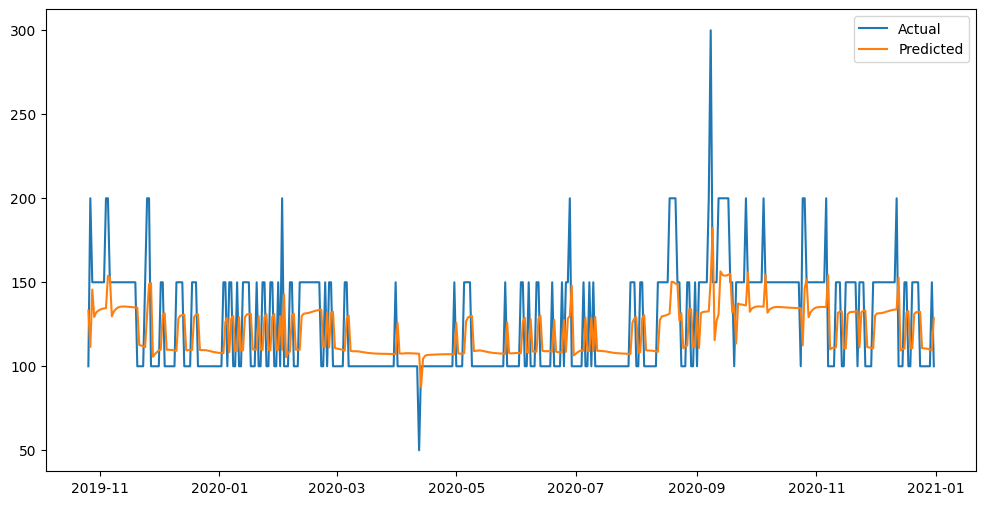

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['AQI'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictions, label='Predicted')
plt.legend()

In [ ]:
# Pollutant CO
combine['CO_scaled'] = scaler.fit_transform(combine['CO'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_CO, y_CO = create_sequences(combine['CO_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_CO_train, X_CO_test = X_CO[:train_size], X_CO[train_size:]
y_CO_train, y_CO_test = y_CO[:train_size], y_CO[train_size:]

In [ ]:
# Build the LSTM model
model2 = Sequential()
model2.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model2.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model2.compile(optimizer='adam', loss='mse')

In [ ]:
X_CO_train = X_CO_train.reshape((X_CO_train.shape[0], X_CO_train.shape[1], 1))
# Train the model
model2.fit(X_CO_train, y_CO_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 6s 70ms/step - loss: 0.0251 - val_loss: 0.0080
Epoch 2/20
44/44 [==============================] - 2s 49ms/step - loss: 0.0089 - val_loss: 0.0074
Epoch 3/20
44/44 [==============================] - 2s 48ms/step - loss: 0.0081 - val_loss: 0.0067
Epoch 4/20
44/44 [==============================] - 1s 33ms/step - loss: 0.0079 - val_loss: 0.0066
Epoch 5/20
44/44 [==============================] - 1s 26ms/step - loss: 0.0080 - val_loss: 0.0075
Epoch 6/20
44/44 [==============================] - 1s 15ms/step - loss: 0.0078 - val_loss: 0.0063
Epoch 7/20
44/44 [==============================] - 1s 15ms/step - loss: 0.0074 - val_loss: 0.0061
Epoch 8/20
44/44 [==============================] - 1s 14ms/step - loss: 0.0073 - val_loss: 0.0062
Epoch 9/20
44/44 [==============================] - 1s 13ms/step - loss: 0.0072 - val_loss: 0.0065
Epoch 10/20
44/44 [==============================] - 1s 15ms/step - loss: 0.0070 - val_loss: 0.0055
Epoch 11/

In [ ]:
# make predictions
X_CO_test = X_CO_test.reshape((X_CO_test.shape[0], X_CO_test.shape[1], 1))
predictionsCO = model2.predict(X_CO_test)
predictionsCO = scaler.inverse_transform(predictionsCO)

14/14 [==============================] - 1s 11ms/step


In [ ]:
# evaluate the performance of the model
mseCO = mean_squared_error(combine['CO'][train_size+sequence_length:], predictionsCO)
print(f'Mean Squared Error: {mseCO}')

Mean Squared Error: 0.011878456129654153


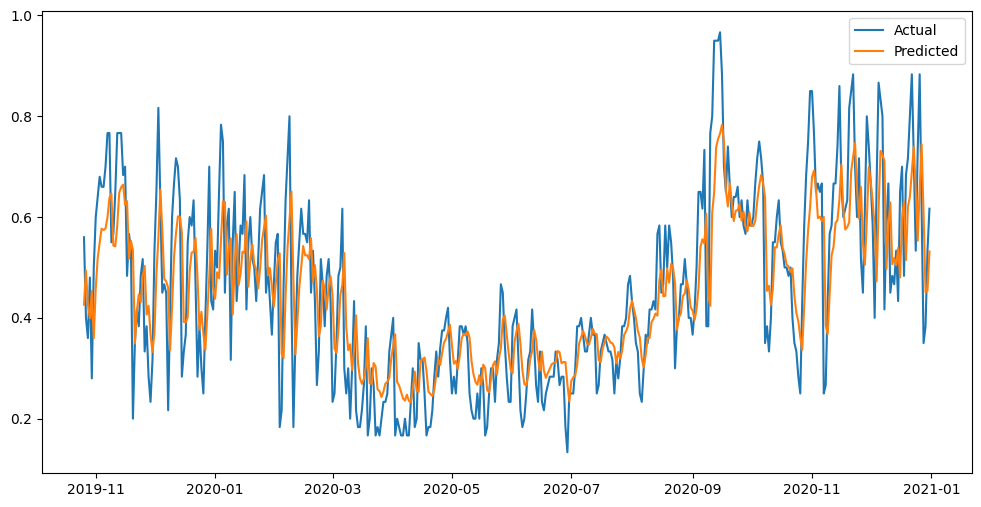

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['CO'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsCO, label='Predicted')
plt.legend()

In [ ]:
model2.save('San-Bernardino-CO.keras')

In [ ]:
model.save('San-Bernardino-AQI.keras')

In [ ]:
# Pollutant PM2.5
combine['PM2.5_scaled'] = scaler.fit_transform(combine['PM2.5'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_PM, y_PM = create_sequences(combine['PM2.5_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_PM_train, X_PM_test = X_PM[:train_size], X_PM[train_size:]
y_PM_train, y_PM_test = y_PM[:train_size], y_PM[train_size:]

In [ ]:
# Build the LSTM model
model3 = Sequential()
model3.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model3.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model3.compile(optimizer='adam', loss='mse')

In [ ]:
X_PM_train = X_PM_train.reshape((X_PM_train.shape[0], X_PM_train.shape[1], 1))
# Train the model
model3.fit(X_PM_train, y_PM_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 2s 19ms/step - loss: 0.0169 - val_loss: 0.0089
Epoch 2/20
44/44 [==============================] - 1s 14ms/step - loss: 0.0103 - val_loss: 0.0082
Epoch 3/20
44/44 [==============================] - 1s 33ms/step - loss: 0.0102 - val_loss: 0.0085
Epoch 4/20
44/44 [==============================] - 2s 46ms/step - loss: 0.0101 - val_loss: 0.0088
Epoch 5/20
44/44 [==============================] - 2s 44ms/step - loss: 0.0101 - val_loss: 0.0084
Epoch 6/20
44/44 [==============================] - 2s 44ms/step - loss: 0.0099 - val_loss: 0.0082
Epoch 7/20
44/44 [==============================] - 2s 37ms/step - loss: 0.0099 - val_loss: 0.0086
Epoch 8/20
44/44 [==============================] - 1s 32ms/step - loss: 0.0097 - val_loss: 0.0081
Epoch 9/20
44/44 [==============================] - 1s 33ms/step - loss: 0.0096 - val_loss: 0.0084
Epoch 10/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0095 - val_loss: 0.0077
Epoch 11/

In [ ]:
# make predictions
X_PM_test = X_PM_test.reshape((X_PM_test.shape[0], X_PM_test.shape[1], 1))
predictionsPM = model3.predict(X_PM_test)
predictionsPM = scaler.inverse_transform(predictionsPM)

14/14 [==============================] - 0s 4ms/step


In [ ]:
# evaluate the performance of the model
msePM = mean_squared_error(combine['PM2.5'][train_size+sequence_length:], predictionsPM)
print(f'Mean Squared Error: {msePM}')

Mean Squared Error: 18.20608884642398


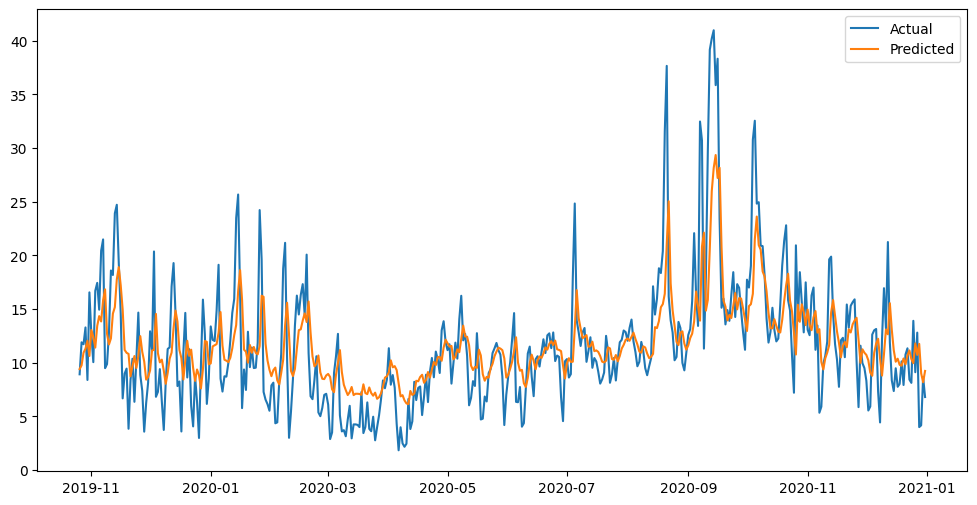

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['PM2.5'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsPM, label='Predicted')
plt.legend()

In [ ]:
model3.save('San-Bernardino-PM2.5.keras')